<a href="https://colab.research.google.com/github/grupos4g4/PROJAPLIC1/blob/main/Projeto_Aplicado_I_Etapas_Finais_(Sem_Dados_Objetivos_Futuros).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script do Projeto desenvolvido utilizando a linguagem Python

Importação das Bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

Importação do Dataset

In [ ]:
#Vamos fazer a importação do no Dataset
df = pd.read_csv('/content/ObesityDataSet.csv')

Classificação dos dados presentes em cada coluna do dataframe

In [ ]:
df.columns

Apresentação bruta dos dados

In [ ]:
df.head()

Nesta célula, analisamos as colunas e indentificamos quais variáveis são categóricas e quais são númericas

In [ ]:
df.info()

Valores de Mediana, desvio padrão, valor mínimo, máximo, quartis, retiramos o COUNT, devido se referenciar as linhas com exceção das colunas com variáveis categóricas

In [ ]:
df.describe().drop('count')

Teste para verificação de valores nulos nas colunas

In [ ]:
df.isnull().sum()# passou no teste, não há valores nulos

*Por meio de uma análise inicial, os dados estão relacionados à saude de individudos, com uma coluna final, que mostra uma variável categórica representando o nível de obesidade.*

Identificação dos nomes dado a cada categoria de IMC no dataset

In [ ]:
df.NObeyesdad.unique() # Verificação dos nomes de cada categoria

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

*A funções seguintes irão plotar alguns gráficos para as análises tanto em colunas quanto em pizza em variaveis categoricas, dado escolha ao usuário qual o tipo de gráfico ele gostaria de ter suas análises.*

Função para plotar gráficos em formato de colunas

In [ ]:
def analise_coluna_cat(df, coluna):
    plt.figure(figsize=(8, 6))
    ac = (df[coluna].value_counts(normalize = True) * 100 ) .plot(kind = 'bar', color = [
        '#20b2aa',
        'orange',
        '#b8860b',
        '#bacdff',
        '#ffbaf1',
        'yellow',
        '#fe7272']
    )
    ac.bar_label(ac.containers[0],fmt='%.2f%%', label_type = 'edge')
    ac.margins(y = 0.1)
    plt.ylabel('Porcentagem');

Função para plotar gráficos em formato de pizza

In [ ]:
#Gráfico em pizza
def analise_coluna_cat(df, coluna):
    plt.figure(figsize=(8, 6))
    valores = df[coluna].value_counts(normalize=True)
    cores = ['#20b2aa',
        'orange',
        '#b8860b',
        '#bacdff',
        '#ffbaf1',
        'yellow',
        '#fe7272']
    plt.pie(valores, labels=valores.index, autopct='%.2f%%', colors=cores)
    plt.ylabel(' ')
    plt.title(f'Distribuição de {coluna}')
    plt.show()

*Os códigos a seguir irão analizar a porcentagem de cada variável categórica*

Análise da porcentagem das variáveis categóricas referentes ao IMC.

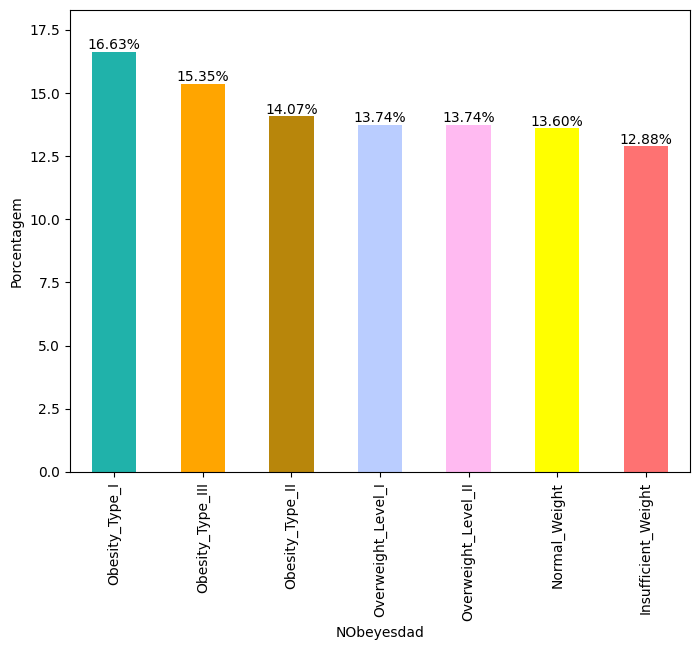

In [ ]:
analise_coluna_cat(df, 'NObeyesdad')

Análise da porcentagem das variáveis categóricas referentes ao Gênero.

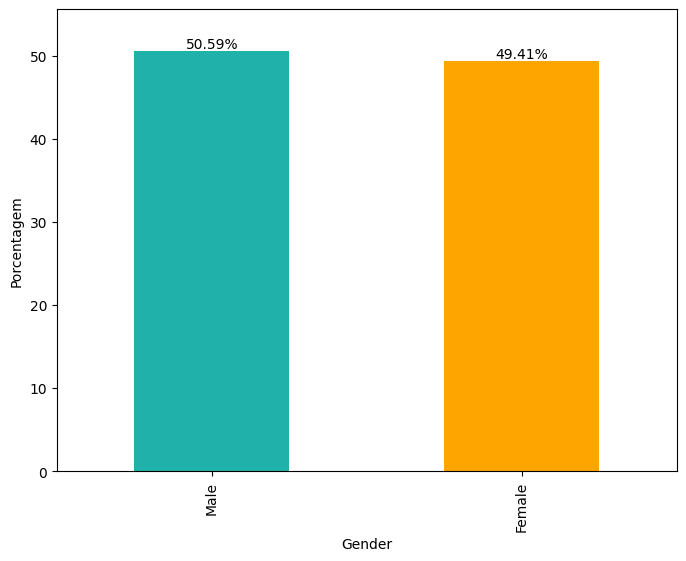

In [ ]:

analise_coluna_cat(df, 'Gender')

Análise da porcentagem das variáveis categóricas referentes ao consumo de bebidas alcoólicas

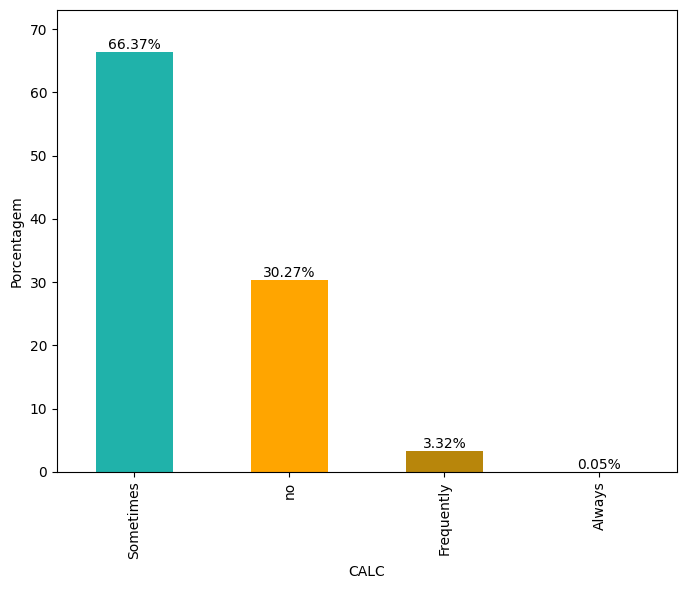

In [ ]:
analise_coluna_cat(df, 'CALC')

Análise da porcentagem das variáveis categóricas referentes ao consumo de alimentos com altos índices calóricos

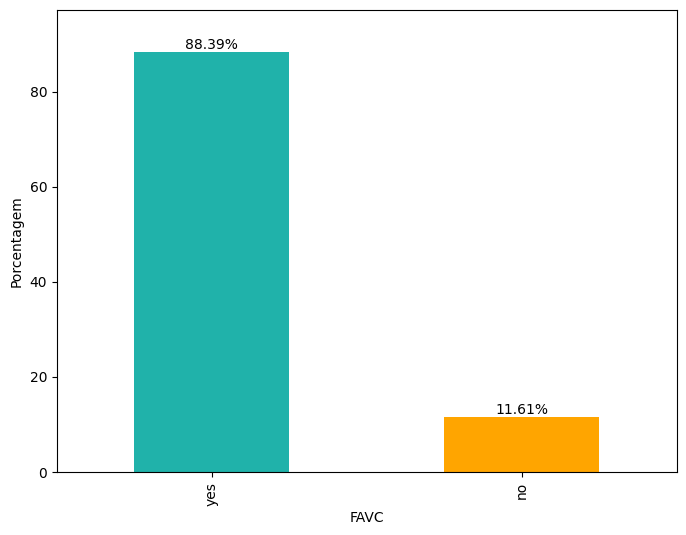

In [ ]:
analise_coluna_cat(df, 'FAVC')

Análise da porcentagem das variáveis categóricas referentes ao histórico familiar de sobrepeso

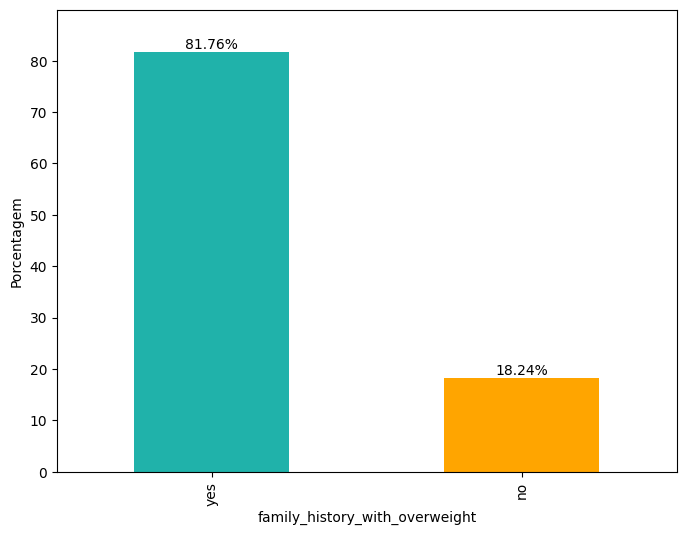

In [ ]:
analise_coluna_cat(df, 'family_history_with_overweight')

Análise da porcentagem das variáveis categóricas referentes ao consumo de alimentos entre as refeições

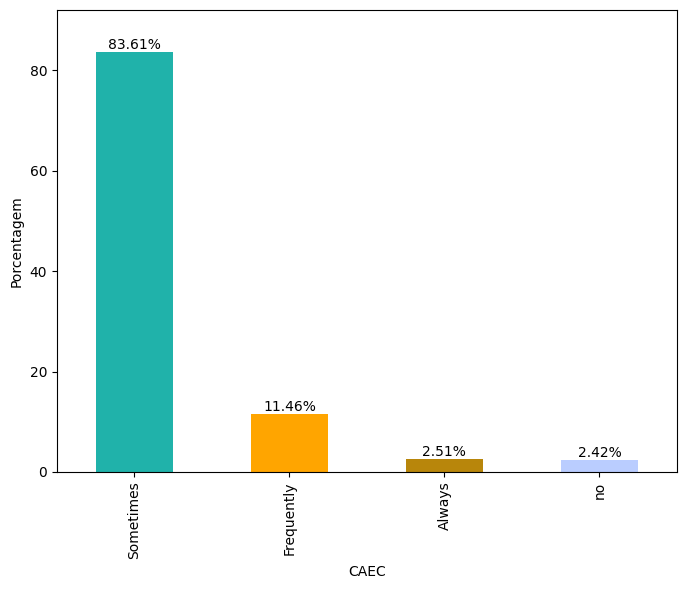

In [ ]:
analise_coluna_cat(df, 'CAEC')

Análise da porcentagem das variáveis categóricas referentes aos fumantes e não-fumantes

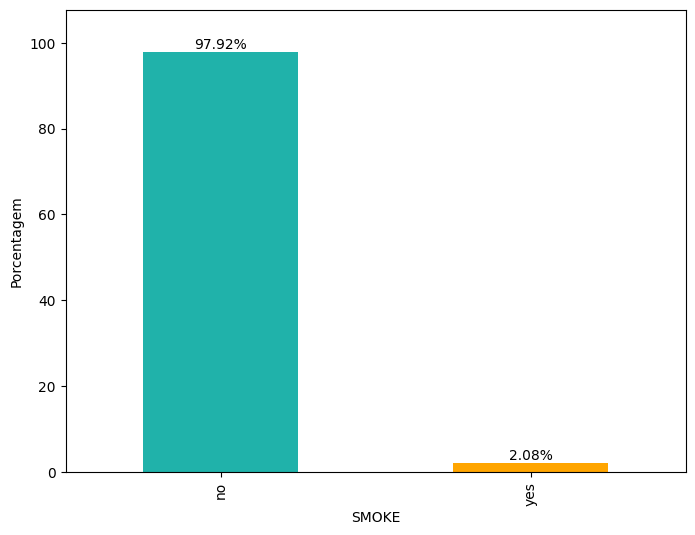

In [ ]:
analise_coluna_cat(df, 'SMOKE')

Análise da porcentagem das variáveis categóricas referentes aos que realizam monitoramento das calorias consumidas durantes as refeições

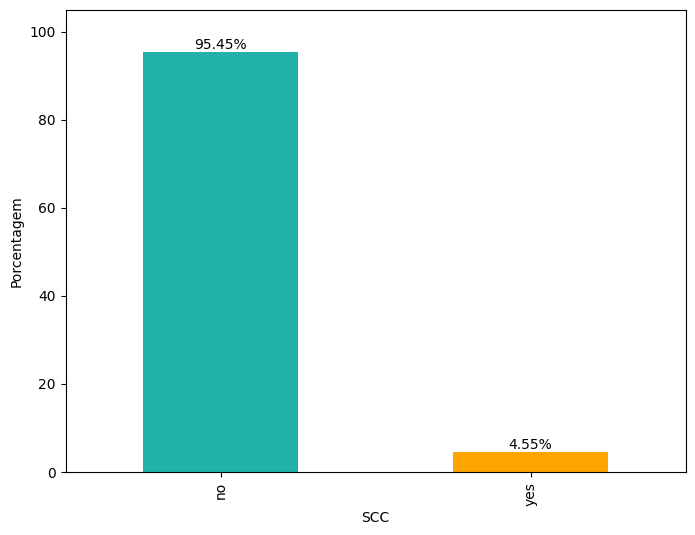

In [ ]:
analise_coluna_cat(df, 'SCC')

Análise da porcentagem das variáveis categóricas referentes aos meios de transporte utilizados para a locomoção

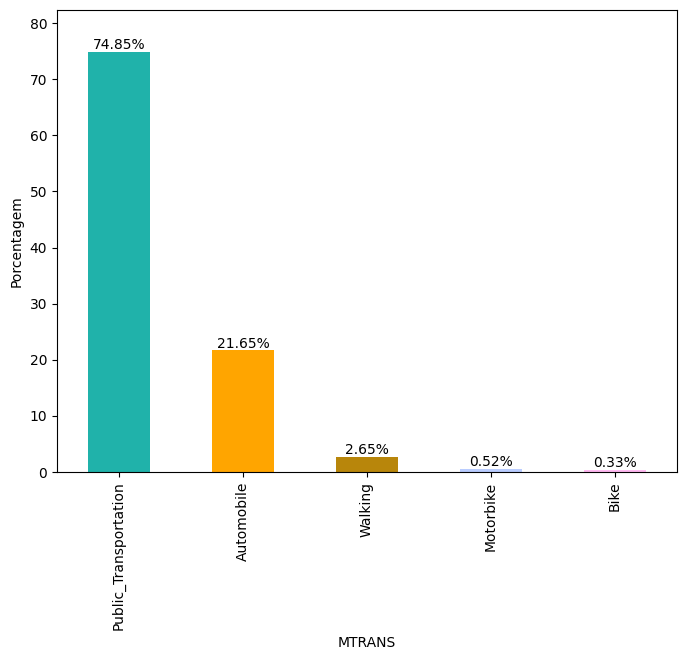

In [ ]:
analise_coluna_cat(df, 'MTRANS')

##Através dos Gráficos em Caixa (BoxPlot), serão analisadas algumas comparações entre algumas colunas, sendo elas categóricas e numéricas, para a determinação aproximada de seus valores interquartis, medianas e a indentificação de outliers

Análise em Gráficos por BoxPlot da relação entre as colunas

Gênero por Idade;
Gênero por Altura;
Histórico Familiar Sobrepeso por Peso (Utilizando uma série Histogramas para comparação)

In [ ]:
#Grafico de todas as variaveis númericas originaisl
sns.set( font_scale=1.0, rc={'figure.figsize':(15,15)} )
eixo = df.hist(bins=20, color= 'blue')

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot( data=df, x='Gender', y= 'Age')
plt.title('Idade')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='Height')
plt.title('Altura')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='family_history_with_overweight', y='Weight')
plt.title('Peso')

plt.tight_layout()


Gráfico em Boxplot contendo os intervalos interquartis e outlier referente Gênero por Idade dos indivíduos

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(1,1,1) # (1 equivale ao padrão, o 1 tamanho ocupado nos quadrantes, 1 a posição em que ele está localizado)
sns.boxplot( data=df, x='Gender', y= 'Age')
plt.title('Gênero por Idade')

plt.tight_layout()

# Mostrar o gráficos
plt.show()

GGráfico em Boxplot contendo os intervalos interquartis e outlier referentes a Gênero pelos pesos e altura dos indivíduos

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # (1 equivale ao padrão, o 3 tamanho ocupado nos quadrantes, 1 a posição em que ele está localizado)
sns.boxplot( data=df, x='Gender', y= 'Weight')
plt.title('Gênero por Peso')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Gender', y='Height')
plt.title('Gênero por Altura')

plt.tight_layout()

# Mostra o gráficos
plt.show()

Gráfico em Boxplot contendo os intervalos interquartis e outlier referentes aos históricos familiares de sobrepeso por Peso e Consumo de Alimentos de alta caloria por Peso

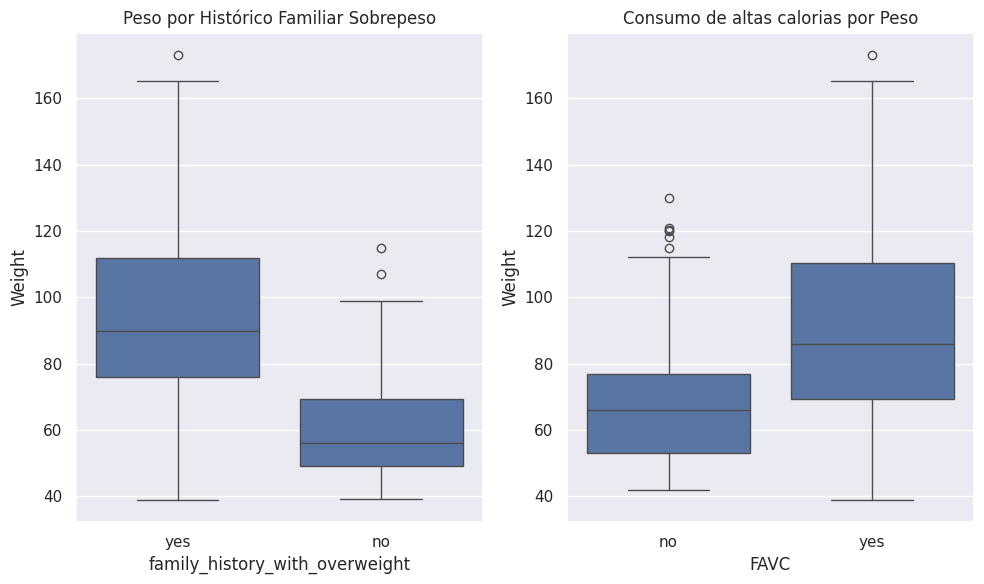

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='family_history_with_overweight', y='Weight')
plt.title('Peso por Histórico Familiar Sobrepeso')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='FAVC', y='Weight')
plt.title('Consumo de altas calorias por Peso')

plt.tight_layout()

# Mostra o gráficos
plt.show()

Identificação de Outliers através do Gráfico em Boxplot de IMC por Idade e Monitoramento de Calorias por Peso

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1, 1, 1 )
sns.boxplot(data=df, x='NObeyesdad', y='Age',)
plt.title('IMC por Idade')

plt.tight_layout()

NameError: name 'plt' is not defined

Identificação de Outliers através do Gráfico em Boxplot de Monitoramento de Calorias por Peso

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(1, 1, 1 )
sns.boxplot(data=df, x='SCC', y='Weight',)
plt.title('Monitora Calorias por Peso')

plt.tight_layout()

Identificação  por meio de um Gráfico de Dispersão da concentração de indivíduos em cada grupo na coluna de IMC de acordo com suas idades.

In [ ]:
plt.figure( figsize=(13,5))
sns.scatterplot( data=df, x='NObeyesdad', y= 'Age')